In [5]:
from matplotlib import pyplot as plt
import numpy as np
from sympy import *


w1 = [[1, 6], [3, 4], [3, 8], [5, 6]]
w2 = [[3, 0] ,[1, -2], [3, -4], [5, -2]]

# pw1 = pw2
Pw1 = 0.5
Pw2 = 0.5

x = Symbol('x')
y =Symbol('y')

In [6]:
def NPDF(a, b, inv):
    diff_t = [list(np.subtract(a, b))]
    diff = np.transpose(diff_t)
    d1 = np.dot(diff_t, inv)
    d2 = np.dot(d1, diff)
    print(d2[0][0])
    return log(1 / (2 * np.pi * sqrt(abs(np.linalg.det(np.linalg.inv(inv)))))) + ((-1/2) * d2[0][0]) 

In [7]:
xlst1 = [pt[0] for pt in w1]
ylst1 = [pt[1] for pt in w1]
xmean1 = np.mean(xlst1)
ymean1 = np.mean(ylst1)
inv1 = np.linalg.inv(np.cov(np.stack((xlst1, ylst1), axis=0)))
gx1 = log(Pw1) + NPDF(list((x, y)), list((xmean1, ymean1)), inv1)
print("Discriminant Function 1: g1(x,y) =", gx1,'\n')                   

xlst2 = [pt[0] for pt in w2]
ylst2 = [pt[1] for pt in w2]
xmean2 = np.mean(xlst2)
ymean2 = np.mean(ylst2)
inv2 = np.linalg.inv(np.cov(np.stack((xlst2, ylst2), axis=0)))
gx2 = log(Pw2) + NPDF(list((x, y)), list((xmean2, ymean2)), inv2)
print("Discriminant Function 2: g2(x, y) =",gx2,'\n')
gx = solve(gx1-gx2, dict = True)
print(gx)


(0.375*x - 1.125)*(x - 3.0) + (0.375*y - 2.25)*(y - 6.0)
Discriminant Function 1: g1(x,y) = -0.5*(0.375*x - 1.125)*(x - 3.0) - 0.5*(0.375*y - 2.25)*(y - 6.0) - 3.51185349998102 

(0.375*x - 1.125)*(x - 3.0) + (0.375*y + 0.75)*(y + 2.0)
Discriminant Function 2: g2(x, y) = -0.5*(0.375*x - 1.125)*(x - 3.0) - 0.5*(0.375*y + 0.75)*(y + 2.0) - 3.51185349998102 

[{y: 2.00000000000000}]


The Decision Boundary is : y = 2.00000000000000 



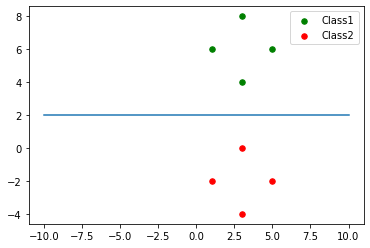

In [8]:
# Plot graph marking the decision bundary
print("The Decision Boundary is : y =", gx[0][y],'\n')

xx = np.linspace(-10, 10, 10)
yy = [lambdify(x, gx[0][y])(val) for val in xx]
plt.plot(xx,np.transpose(yy))
plt.scatter(xlst1, ylst1, label="Class1", color="green", s = 30)
plt.scatter(xlst2, ylst2, label="Class2", color="red", s = 30) 
plt.legend()
plt.show()